(image-filtering:convolution)=
# Convolution
When we apply a so called _linear_ filter to an image we compute every new pixel as a weighted sum of its neighbors. The process is called [_convolution_](https://en.wikipedia.org/wiki/Convolution) and the matrix defining the weights is called _convolution kernel_. In the context of microscopy, we often speal about the point-spread-function (PSF) of microscopes. This PSF technically describes how an image is convolved by the microsocpe before we save it to disk.

In [1]:
import numpy as np
import pyclesperanto_prototype as cle
from skimage.io import imread
from pyclesperanto_prototype import imshow
from skimage import filters
from skimage.morphology import ball
from scipy.ndimage import convolve
import matplotlib.pyplot as plt

cle.select_device('RTX')

<gfx90c on Platform: AMD Accelerated Parallel Processing (2 refs)>

For demonstrating the principle of convolution, we first define an example image that's rather simple.

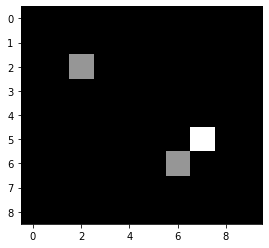

In [2]:
image = np.asarray([
  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 2, 0, 0],
  [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
]).astype(float)

imshow(image)

Next, we define a simple convolution kernel, that is represented by a small image.

In [3]:
kernel = np.asarray([
  [0, 1, 0],
  [1, 1, 1],
  [0, 1, 0],
])

Next, we convolve the image with the kernel using [scipy.ndimage.convolve](https://docs.scipy.org/doc/scipy/reference/generated/scipy.ndimage.convolve.html). When we print out the result, we can see how a `1` in the original image spreads, because for every directly neighboring pixel, the kernel sums the neighbor intensities. If there are multuple pixels with intensity > 0 in the original image, the resulting image will in their neighborhood compute the sum. You could call this kernel a local sum-kernel.

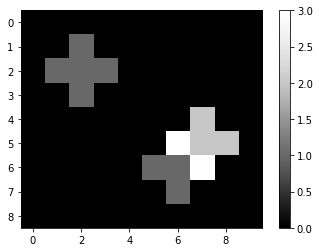

In [4]:
convolved = convolve(image, kernel)

imshow(convolved, colorbar=True)

In [5]:
convolved

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 1., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 2., 0., 0.],
       [0., 0., 0., 0., 0., 0., 3., 2., 2., 0.],
       [0., 0., 0., 0., 0., 1., 1., 3., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

## Other kernels
Depending on which kerne is used for the convolution, the images can look quite differently. A _mean_-kernel for example computes the average pixel intensity locally:

In [6]:
mean_kernel = np.asarray([
  [0, 0.2, 0],
  [0.2, 0.2, 0.2],
  [0, 0.2, 0],
])

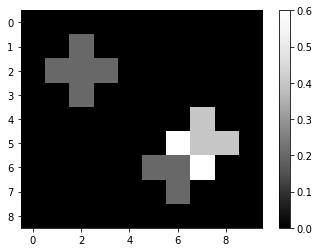

In [7]:
mean_convolved = convolve(image, mean_kernel)

imshow(mean_convolved, colorbar=True)

In [8]:
mean_convolved

array([[0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0.2, 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0.2, 0.2, 0.2, 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0.2, 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.4, 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0.6, 0.4, 0.4, 0. ],
       [0. , 0. , 0. , 0. , 0. , 0.2, 0.2, 0.6, 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0.2, 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ]])

The following kernel is a simple form of a [Laplace operator](https://en.wikipedia.org/wiki/Laplace_operator).

In [9]:
laplace_operator = np.asarray([
  [0, 1, 0],
  [1, -4, 1],
  [0, 1, 0],
])

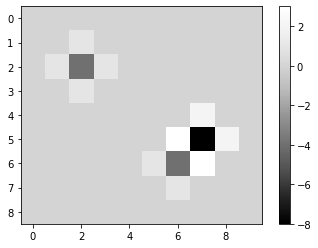

In [10]:
laplacian = convolve(image, laplace_operator)

imshow(laplacian, colorbar=True)

In [11]:
laplacian

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1., -4.,  1.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  2.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  3., -8.,  2.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  1., -4.,  3.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]])

To demonstrate what these different kernels do, we apply them to the MRI image shown before.

In [12]:
# open dataset and extract single plane
noisy_mri = imread('../../data/Haase_MRT_tfl3d1.tif')[90].astype(float)

# zoom in by cropping a part out
noisy_mri_zoom = noisy_mri[50:100, 50:100]

In [13]:
convolved_mri = convolve(noisy_mri_zoom, kernel)
mean_mri = convolve(noisy_mri_zoom, mean_kernel)
laplacian_mri = convolve(noisy_mri_zoom, laplace_operator)

Text(0.5, 1.0, 'Mean-kernel')

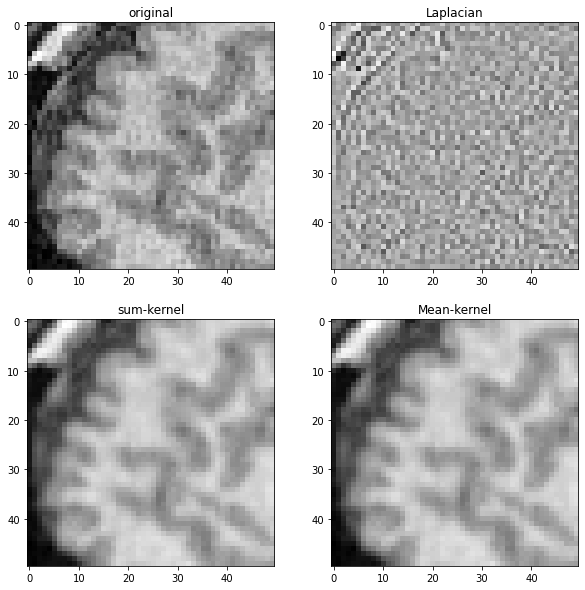

In [14]:
fig, axes = plt.subplots(2, 2, figsize=(10,10))

imshow(noisy_mri_zoom, plot=axes[0,0])
axes[0,0].set_title("original")
imshow(laplacian_mri, plot=axes[0,1])
axes[0,1].set_title("Laplacian")
imshow(convolved_mri, plot=axes[1,0])
axes[1,0].set_title("sum-kernel")
imshow(mean_mri, plot=axes[1,1])
axes[1,1].set_title("Mean-kernel")